In [1]:
%load_ext gvmagic

import ddueruem
ddueruem.init(silent=True, no_log=True)

In [2]:
expr = ddueruem.parsing("examples/berkeleydb.dimacs")
expr.verbose()

'(BerkeleyDb) ∧ (FNIOType ∨ ¬featureNIO) ∧ (FNIOType ∨ ¬featureChunkedNIO) ∧ (¬FNIOType ∨ featureNIO ∨ featureChunkedNIO) ∧ (¬featureNIO ∨ ¬featureChunkedNIO) ∧ (FLogging ∨ ¬Logging) ∧ (EnvStats ∨ ¬featureStatisticsEnvLog) ∧ (EnvStats ∨ ¬featureStatisticsEnvINCompressor) ∧ (EnvStats ∨ ¬BerkeleyDb0) ∧ (EnvStats ∨ ¬BerkeleyDbBerkeleyDb) ∧ (EnvStats ∨ ¬BerkeleyDbFNIOType) ∧ (EnvStats ∨ ¬BerkeleyDbfeatureNIO) ∧ (EnvStats ∨ ¬BerkeleyDbfeatureChunkedNIO) ∧ (EnvStats ∨ ¬BerkeleyDbFLogging) ∧ (¬EnvStats ∨ BerkeleyDbFLogging) ∧ (BerkeleyDbLogging ∨ ¬BerkeleyDbEnvStats) ∧ (BerkeleyDbfeatureStatisticsEnvLog ∨ ¬BerkeleyDbfeatureStatisticsEnvINCompressor) ∧ (BerkeleyDbfeatureStatisticsEnvLog ∨ ¬FNIOType0) ∧ (BerkeleyDbfeatureStatisticsEnvLog ∨ ¬FNIOTypeBerkeleyDb) ∧ (BerkeleyDbfeatureStatisticsEnvLog ∨ ¬FNIOTypeFNIOType) ∧ (BerkeleyDbfeatureStatisticsEnvLog ∨ ¬FNIOTypefeatureNIO) ∧ (¬BerkeleyDbfeatureStatisticsEnvLog ∨ BerkeleyDbfeatureStatisticsEnvINCompressor ∨ FNIOType0 ∨ FNIOTypeBerkeleyDb ∨ FN

In [3]:
order = ddueruem.ordering(expr, "force-triage") # Use the converging FORCE method for preordering

# A resonable order:
# order = [4, 10, 15, 1, 12, 16, 5, 8, 11, 0, 6, 7, 9, 13, 17, 14, 3, 18, 2]

In [8]:
from adapters import BDD, Adapter_CUDD as CUDD

bdd = BDD(CUDD)
bdd.buildFrom(expr, order)

In [10]:
bdd.dump()
bdd.meta

{'ddueruem-version': 'v2021-07',
 'lib-name-stub': 'cudd',
 'lib-name': 'CUDD 3.0.0',
 'input-name': 'examples/berkeleydb.dimacs',
 'input-hash': 'eb06505ad6e1c838cffc360a5f3940e2',
 'n_vars': 76,
 'n_cnf_clauses': 141,
 'n_tautological_clauses': 0,
 'runtime-parsing': '0.008 s',
 'runtime-preodering': '0.164 s',
 'runtime-compilation': '0.007 s',
 'n_nodes': 453,
 'root': '1:2935457392137',
 'order': '63,64,3,4,2,65,76,25,51,24,26,40,41,69,49,46,50,74,52,47,38,48,70,32,1,34,37,31,30,6,36,73,5,39,33,72,62,18,21,27,29,20,23,22,71,28,19,35,16,10,14,45,58,61,54,11,44,13,12,7,15,8,68,9,42,60,59,56,66,57,67,43,17,55,53,75'}

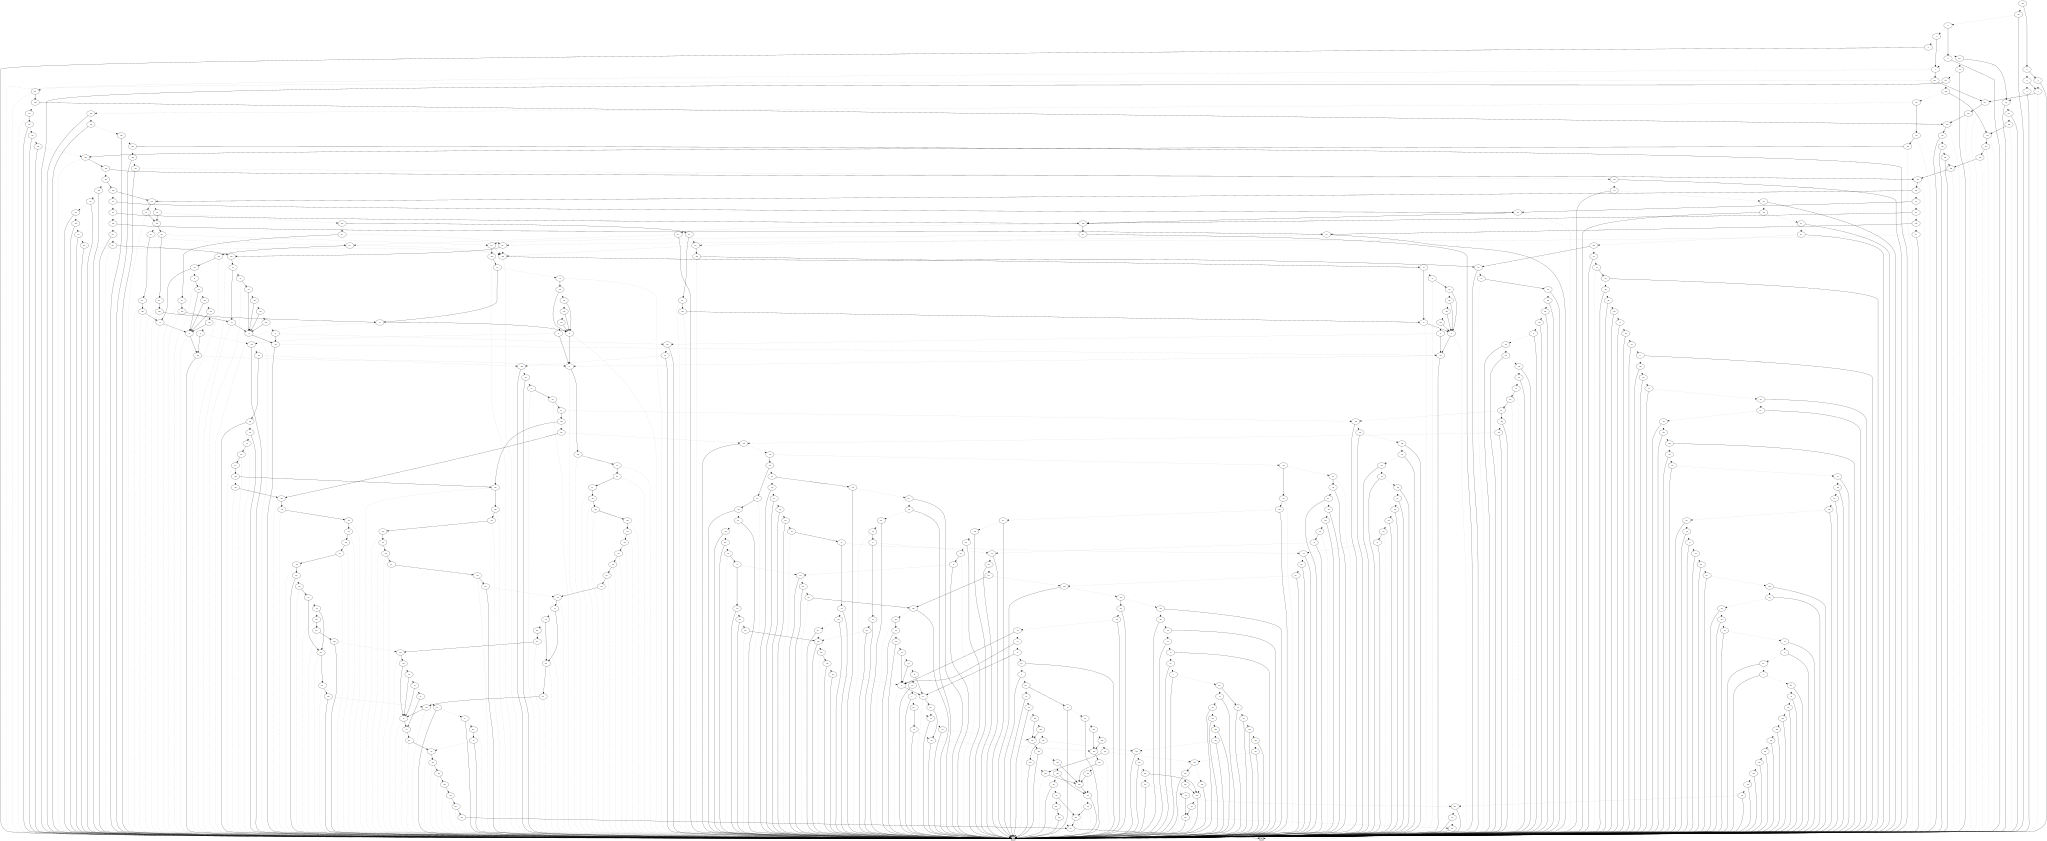

In [6]:
%dotobj bdd